# Objective - To predict Respone(Credit Rating) of person by different given measuring features.
# Credit Rating -
            When you use credit, you are borrowing money that you promise to pay back within a specified period of time. A credit Rating is a statistical method to determine the likelihood of an individual paying back the money he or she has borrowed.
People have become increasingly dependent on credit. Therefore, it's crucial to determine personal credit reports and credit rating. 


In [1]:
import os
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
#setting working directory
os.chdir("D:\\soul")

In [3]:
#reading txt file , used "\t" to seperate each column and reading it as a dataframe
data=pd.read_csv("ModelingData.txt",sep="\t")

In [4]:
#view first 5 records
data.head(5)

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1.0,0.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,67.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0
1,2.0,1.0,48.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,22.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0
2,3.0,3.0,12.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,...,49.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0
3,4.0,0.0,42.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,45.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0
4,5.0,0.0,24.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,53.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0


In [5]:
#droppoing NaN records created while reading txt
data=data.drop([1000,1001],axis=0)

In [6]:
#view last 3 records
data.tail(3)

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
997,998.0,3.0,12.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,38.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0
998,999.0,0.0,45.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,23.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0
999,1000.0,1.0,45.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,27.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0


# DATA UNDERSTANDING

In [7]:
# overview of data using package pandas profiling
import pandas_profiling as pp
pp.ProfileReport(data)


C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramDa

Number of variables,32
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,257.8 KiB
Average record size in memory,264.0 B
Numeric,12
Categorical,0
Boolean,20
Date,0
Text (Unique),0
Rejected,0


# REPORT 
NO Features are Highly corelated.

40% Records of feature "History" belongs to no credit taken.

Only 6.2% of people from the given data is unemployed and 2.2% people are unemployed and non-resident.

Majority of people about 60% have less than 100DM Average balance in savings account

# About 90% records are Residents and have a co-applicant & are educated. But don't have a gaurantor.

In [7]:
#checking missing values
data.isnull().sum()

OBS#                0
CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          0
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 0
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
RESPONSE            0
dtype: int64

In [8]:
#remove feature id
data=data.drop("OBS#",axis=1)

checking multicollinearity 

In [10]:
#check vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xdata=data.copy()
Xdata['intercept']=1
Xdata=Xdata
vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(Xdata.values,i) for i in range(Xdata.shape[1])]
vif['Variables']=Xdata.columns.values
vif

,Vif,Variables
0,1.260224,CHK_ACCT
1,2.004437,DURATION
2,1.425358,HISTORY
3,4.166067,NEW_CAR
4,2.807043,USED_CAR
5,3.693753,FURNITURE
6,4.605435,RADIO/TV
7,1.912905,EDUCATION
8,2.625301,RETRAINING
9,2.396143,AMOUNT


In [11]:
#check columns
data.columns

Index(['CHK_ACCT', 'DURATION', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE',
       'RADIO/TV', 'EDUCATION', 'RETRAINING', 'AMOUNT', 'SAV_ACCT',
       'EMPLOYMENT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE',
       'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
       'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT',
       'OWN_RES', 'NUM_CREDITS', 'JOB', 'NUM_DEPENDENTS', 'TELEPHONE',
       'FOREIGN', 'RESPONSE'],
      dtype='object')

In [12]:
# taking all feature which need to change into category
var=['CHK_ACCT','HISTORY','NEW_CAR', 'USED_CAR','FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING','SAV_ACCT','EMPLOYMENT','PRESENT_RESIDENT','JOB','TELEPHONE','FOREIGN', 'RESPONSE']

In [13]:
#changing to data type to category
data[var]=data[var].astype('category')

In [14]:
#view data types
data.dtypes

CHK_ACCT            category
DURATION             float64
HISTORY             category
NEW_CAR             category
USED_CAR            category
FURNITURE           category
RADIO/TV            category
EDUCATION           category
RETRAINING          category
AMOUNT               float64
SAV_ACCT            category
EMPLOYMENT          category
INSTALL_RATE         float64
MALE_DIV             float64
MALE_SINGLE          float64
MALE_MAR_or_WID      float64
CO-APPLICANT         float64
GUARANTOR            float64
PRESENT_RESIDENT    category
REAL_ESTATE          float64
PROP_UNKN_NONE       float64
AGE                  float64
OTHER_INSTALL        float64
RENT                 float64
OWN_RES              float64
NUM_CREDITS          float64
JOB                 category
NUM_DEPENDENTS       float64
TELEPHONE           category
FOREIGN             category
RESPONSE            category
dtype: object

In [15]:
# checking value counts of target variable
data["RESPONSE"].value_counts()

1.0    700
0.0    300
Name: RESPONSE, dtype: int64

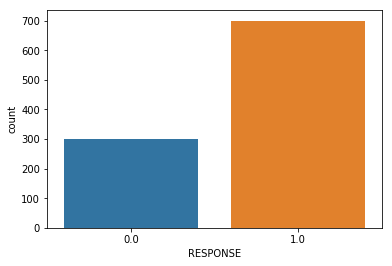

In [16]:
#view imbalance 
sns.countplot(x='RESPONSE',data=data)

most of records in given data has good credit rating

# checking outliers

In [17]:
#taking all numeric values to check outliers
num_values1=data.select_dtypes(['float64']).columns


In [18]:
#converting data type to integer.
data[num_values1]=data[num_values1].astype('int')

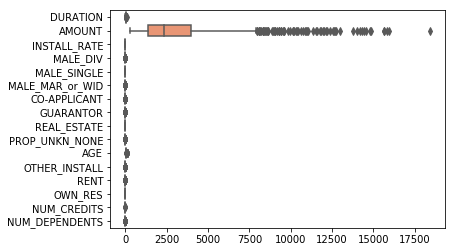

In [19]:
#view outliers for all numeric variables
fig, axs = plt.subplots()
sns.boxplot(data=data[num_values1],orient='h',palette="Set2")
plt.show()

outliers got detected, most deviated records got found in feature "AMOUNT"

Few records have greater credit amount, which is acting as outlier. This can mislead model while training.

In [21]:
#calculating inter quatile and upper whisker value
q75, q25 = np.percentile(data["AMOUNT"], [75 ,25])
iqr = q75-q25
print("IQR",iqr)
upper = q75 + (1.5*iqr)
print("Upper",upper)

IQR 2606.75
Upper 7882.375


In [22]:
#replace outliers with upper wishker
data["AMOUNT"] = data["AMOUNT"].clip(upper=upper)


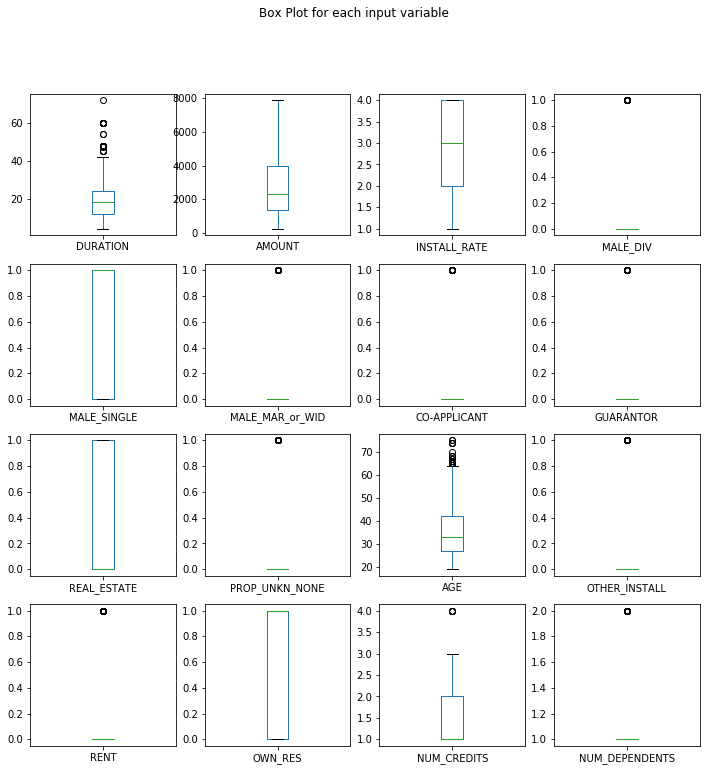

In [23]:
# view 
data[num_values1].plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12),title='Box Plot for each input variable')
plt.show()

# Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


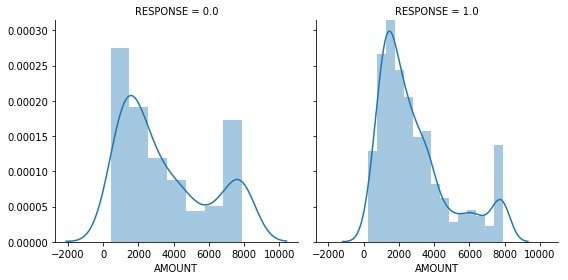

In [25]:
# Response vs AMOUNT
g = sns.FacetGrid(data,col='RESPONSE',size = 4)
g.map(sns.distplot,'AMOUNT')
plt.show()

Majority of records have credit amount between 0-4000.

Majority of records who's credit rating is good have credit amount of about 2000.


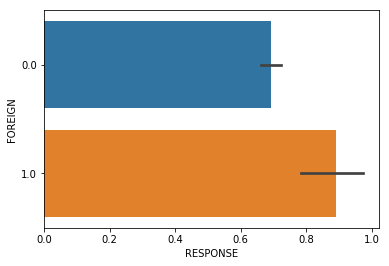

In [27]:
# RESPONSE vs FOREIGN
data['RESPONSE']=data['RESPONSE'].astype('int')
sns.barplot(x='RESPONSE',y='FOREIGN',data=data)


From average records its states that Foreign worker records have mostly good credit rating 

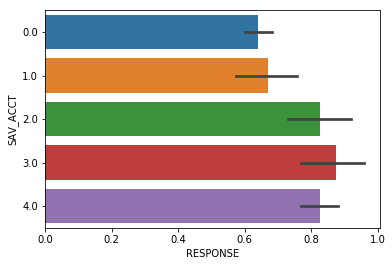

In [28]:
#RESPONSE vs SAV_ACCT
sns.barplot(x='RESPONSE',y='SAV_ACCT',data=data)


Records which have Average balance in savings account between 100 to 1000DM have good credit rating

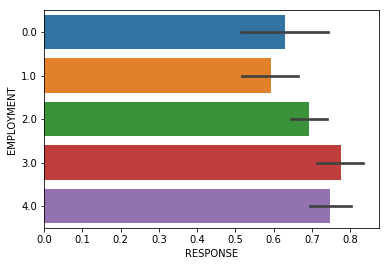

In [29]:
#RESPONSE vs EMPLOYMENT
sns.barplot(x='RESPONSE',y='EMPLOYMENT',data=data)


People with 3rd year running in employment have the highest chance of having good credit rating.

In [32]:
#change data type of target variable
data['RESPONSE']=data['RESPONSE'].astype("category")


# Splitting data into train and validation for evaluation and testing

In [34]:
# Divide into train and test
from sklearn.model_selection import train_test_split
train_target=data["RESPONSE"]
train1=data.drop('RESPONSE', axis=1)
train2,val2,train_target2,val_target2 = train_test_split(train1, train_target, test_size=0.3)  

# MODEL1 - Logistic Regression 

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight={1:0.6,0:0.4}) # Balancing imbalance by giving class weightage
logreg.fit(train2, train_target2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={1: 0.6, 0: 0.4}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [36]:
# PREDICT
newtrain = logreg.predict(train2)
newtest = logreg.predict(val2)

In [37]:
#checking accuracy

from sklearn.metrics import accuracy_score
print(accuracy_score(train_target2,newtrain))
print(accuracy_score(val_target2,newtest))

0.7714285714285715
0.76


In [40]:
from sklearn.metrics import classification_report
print(classification_report(train_target2,newtrain))
print(classification_report(val_target2,newtest))

              precision    recall  f1-score   support

           0       0.74      0.36      0.48       209
           1       0.78      0.95      0.85       491

   micro avg       0.77      0.77      0.77       700
   macro avg       0.76      0.65      0.67       700
weighted avg       0.77      0.77      0.74       700

              precision    recall  f1-score   support

           0       0.72      0.34      0.46        91
           1       0.77      0.94      0.85       209

   micro avg       0.76      0.76      0.76       300
   macro avg       0.74      0.64      0.65       300
weighted avg       0.75      0.76      0.73       300



# ROC Metric

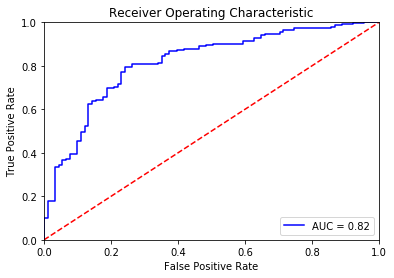

In [39]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(val2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(val_target2, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Area under the curve = 0.82


# MODEL2 - LOGISTIC Regression
NOTE-  After removing multicollinearity

In [42]:
#remove features having multicollinearity
train2=train2.drop("OWN_RES",axis=1)
val2=val2.drop("OWN_RES",axis=1)

train2=train2.drop("RADIO/TV",axis=1)
val2=val2.drop("RADIO/TV",axis=1)

train2=train2.drop("RENT",axis=1)
val2=val2.drop("RENT",axis=1)



In [43]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(class_weight={1:0.6,0:0.4})
log.fit(train2, train_target2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={1: 0.6, 0: 0.4}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [44]:
newtrain1 = log.predict(train2)
newtest1 = log.predict(val2)

In [45]:
#checking accuracy

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

print(accuracy_score(train_target2,newtrain1))
print(accuracy_score(val_target2,newtest1))

0.7657142857142857
0.7666666666666667


Slightly accuracy got increased after removing multicollinearity 

# Smooting 

In [46]:
#using smote to overcome class imbalance instead of giving seperate class weights to model while training

from imblearn.over_sampling import SMOTE 
sm=SMOTE(random_state=42)
X_train_sm, y_train_sm =sm.fit_sample(train2,train_target2)


# Model3 - Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

model1 = RandomForestClassifier(n_estimators=100,max_depth=2,max_features=5,n_jobs=1)
model1.fit(X=X_train_sm, y=y_train_sm)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [103]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

train_pred1 = model1.predict(X_train_sm)
print(accuracy_score(y_train_sm,train_pred1))
val_pred1= model1.predict(val2)
print(accuracy_score(val_target2,val_pred1))

0.7963340122199593
0.71


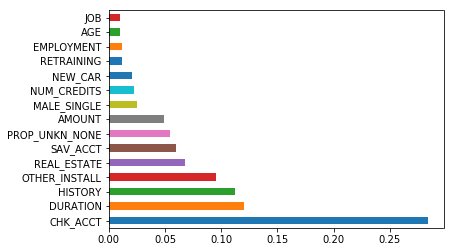

In [104]:
# Features importance plot

feat_importances = pd.Series(model1.feature_importances_, index=train2.columns)
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.nlargest(15).plot(kind='barh')

# Model4 - XG-BOOST

In [105]:
# Dummification before giving data to xgboost
train3 = pd.get_dummies(train2)
val3 = pd.get_dummies(val2)


In [123]:
from xgboost import XGBClassifier
xgb=XGBClassifier(class_weight={1:0.6,0:0.4},learning_rate=0.001)
xgb.fit(train3,train_target2)


XGBClassifier(base_score=0.5, booster='gbtree', class_weight={1: 0.6, 0: 0.4},
       colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.001, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

train_predxg = xgb.predict(train3)
print(accuracy_score(train_target2,train_predxg))
val_predxg= xgb.predict(val3)
print(accuracy_score(val_target2,val_predxg))

0.7485714285714286
0.7166666666666667


# Grid Search

In [165]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV 
GBM = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150,200,250],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.5,0.9]}
 
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv= 3)
CV_GBM.fit(X=train3, y=train_target2)
print (CV_GBM.best_score_, CV_GBM.best_params_)

0.7428571428571429 {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 150}


In [169]:
y_pred=CV_GBM.predict(val3)
accuracy_score(val_target2,y_pred)

0.72

# Dimensionality reduction using PCA

In [172]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(train2)
principaltrain = pd.DataFrame(data = principalComponents
             , columns = range(0,15))

In [174]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(val2)
principalval = pd.DataFrame(data = principalComponents
             , columns = range(0,15))

#Taking starting 15 components 80% variance

# Model 6- After PCA

In [201]:

logpca = LogisticRegression(class_weight={1:0.5,0:0.5},max_iter=150,n_jobs=3,C=0.1)
logpca.fit(principaltrain, train_target2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=0.1, class_weight={1: 0.5, 0: 0.5}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=150,
          multi_class='warn', n_jobs=3, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [202]:
train_predpca = logpca.predict(principaltrain)
print(accuracy_score(train_target2,train_predpca))
val_predpca= logpca.predict(principalval)
print(accuracy_score(val_target2,val_predpca))

0.7714285714285715
0.71


# Summary -
                 The ML classification Models were created which successfully predicted Response ("credit Rating") of records by different given measuring features.
                 
Different Insights where taken out after understanding data and visualization.

The Machine Learnig models used where Logistic Regression, Random forest, Xg Boost.
Got Best predictions from model Logistic Regression with train & test almost 77%.
Grid search was used which gave good hyper parameters but still couldn't perfrom well as compare to simple learners.
 
Using Dimensionality Reduction Technique PCA was not usefully in this scenario.
 
The features where not having much correlation. But few features where having multicollinearity which where removed later by checking vif value.

Ensembler techniques couldn't perfromed well in this scenario.

Most of the Numeric features where of same unit, almost same Range. Hence Standardization was not required.
  
